In [1]:
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df1=pd.read_csv('gdrive/My Drive/takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df2=pd.read_csv('gdrive/My Drive/users.csv',encoding='latin-1')
df2.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,17-12-2013 03:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,16-12-2012 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,31-07-2013 05:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,05-11-2013 04:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,16-01-2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
#Checking for null values
df1.isnull().head(10)

,time_stamp,user_id,visited
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [8]:
#checking for null values
df2.isnull().head(10)
# There are null values in last session creation, invited_by_user_id

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,False,False,False,True
8,False,False,False,False,False,True,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False


In [9]:
#Replace the misiing values in invited_by_user_id with 0
df2.invited_by_user_id.fillna(0,inplace=True)
df2.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,17-12-2013 03:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,16-12-2012 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0
7,8,31-07-2013 05:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0
8,9,05-11-2013 04:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0
9,10,16-01-2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [10]:
df2.last_session_creation_time.fillna(0,inplace=True)
df2.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,17-12-2013 03:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,16-12-2012 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0
7,8,31-07-2013 05:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0
8,9,05-11-2013 04:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0
9,10,16-01-2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [11]:
#Converting to datetime
df2['last_session_creation_time']=pd.to_datetime(df2['last_session_creation_time'])
df2.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0
5,6,17-12-2013 03:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.387424226,0,0,197,11241.0
6,7,16-12-2012 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1970-01-01 00:00:01.356009872,0,1,37,0.0
7,8,31-07-2013 05:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00.000000000,1,1,74,0.0
8,9,05-11-2013 04:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00.000000000,0,0,302,0.0
9,10,16-01-2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1970-01-01 00:00:01.401833283,1,1,318,4143.0


In [12]:

df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
df1.drop(['visited'],axis=1,inplace=True)
df1.head()

,time_stamp,user_id,7_day_visit
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0
2,2013-11-29 03:45:04,2,1.0
3,2013-12-09 03:45:04,2,1.0
4,2013-12-25 03:45:04,2,1.0


In [17]:
df1['time_stamp']=pd.to_datetime(df1['time_stamp'])
df1.head()

,time_stamp,user_id,7_day_visit
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0
2,2013-11-29 03:45:04,2,1.0
3,2013-12-09 03:45:04,2,1.0
4,2013-12-25 03:45:04,2,1.0


In [18]:
def get_visit_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()
df1['7_day_visit'] = df1.groupby('user_id', as_index=False, group_keys=False).apply(get_visit_count, '7D')
df1.head()

,time_stamp,user_id,7_day_visit
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0
2,2013-11-29 03:45:04,2,1.0
3,2013-12-09 03:45:04,2,1.0
4,2013-12-25 03:45:04,2,1.0


In [19]:
df1.head(10)

,time_stamp,user_id,7_day_visit
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0
2,2013-11-29 03:45:04,2,1.0
3,2013-12-09 03:45:04,2,1.0
4,2013-12-25 03:45:04,2,1.0
5,2013-12-31 03:45:04,2,2.0
6,2014-01-08 03:45:04,2,1.0
7,2014-02-03 03:45:04,2,1.0
8,2014-02-08 03:45:04,2,2.0
9,2014-02-09 03:45:04,2,3.0


In [20]:
# Creating a data frame with adopted_user status against the user_id
# An adopted user/ active user is a user who has logged into the product on three separate days in at least one seven­day period
df_adopted = df1.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_adopted.head(2)
df_adopted['adopted_user'] = (df_adopted['7_day_visit']>2)
df_adopted.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [21]:
#Merging both the dataframes
dfm = pd.merge(df2,df_adopted,how='outer',left_on='object_id',right_on='user_id').drop(['user_id','7_day_visit'],axis=1)

In [29]:
dfm.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,True
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,False
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,False
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,False


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


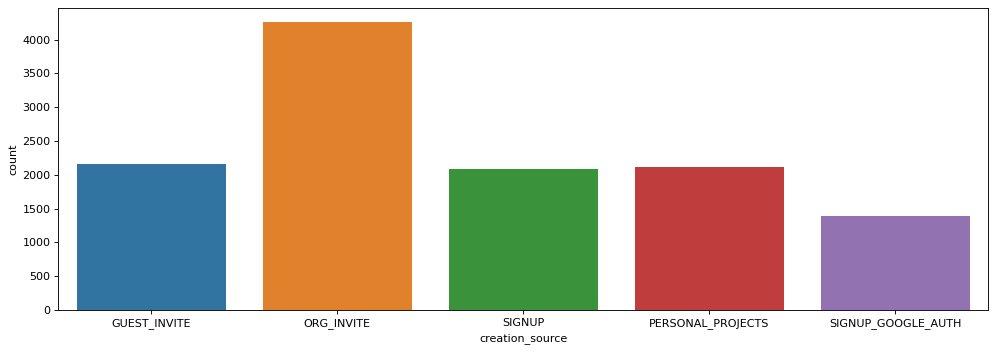

In [23]:
figure(figsize=(15, 5), dpi=80)
sns.countplot(dfm['creation_source'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

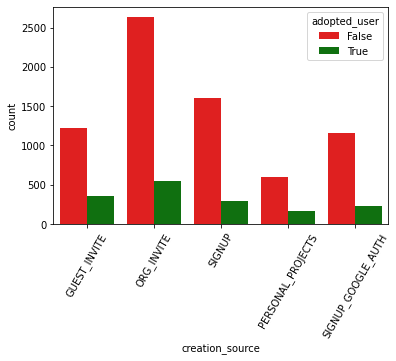

In [24]:
sns.countplot(x="creation_source", data=dfm,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

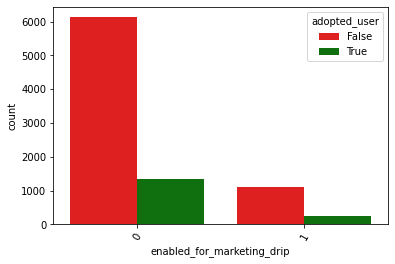

In [25]:
sns.countplot(x="enabled_for_marketing_drip", data=dfm,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


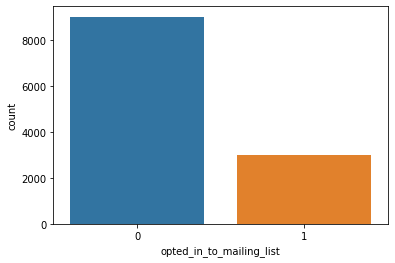

In [26]:
sns.countplot(dfm['opted_in_to_mailing_list'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



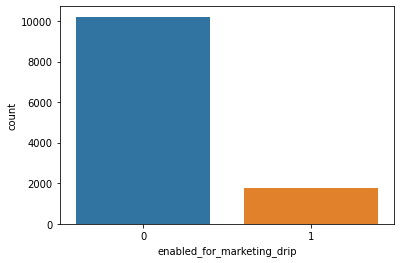

In [43]:
sns.countplot(dfm['enabled_for_marketing_drip'])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

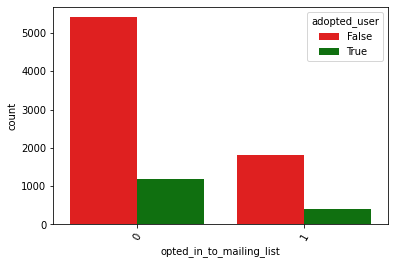

In [28]:
sns.countplot(x="opted_in_to_mailing_list", data=dfm,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)